Dictionaries and sets

 He aquí un breve resumen de este capítulo:
 - Métodos comunes de diccionario
 - Manejo especial de claves perdidas
 - Variaciones de dict en la biblioteca estándar
 - Los tipos set y frozenset
 - Cómo funcionan las tablas hash
 - Implicaciones de las tablas hash: limitaciones del tipo de clave, ordenación impredecible, etc.

**Tipos de mapeo genéricos**

* El módulo collections.abc proporciona los ABCs Mapping y MutableMapping para formalizar las interfaces de dict y tipos similares

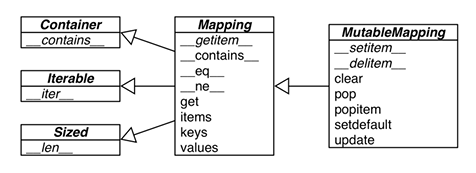

In [8]:
from collections.abc import Mapping

 Las implementaciones de mapeos especializados a menudo extienden dict o collections.User Dict, en lugar de estos ABCs. El principal valor de los ABC es documentar y formalizar las interfaces mínimas para los mapeos, y servir como criterio para las pruebas isinstance en el código que necesita soportar mapeos en un sentido amplio:

In [9]:
my_dict = {}
isinstance(my_dict,Mapping)

True

 Dadas estas reglas básicas, puede construir diccionarios de varias maneras

In [16]:
a = dict(one=1,two=2,three=3)
b = {"one":1, "two":2,"three":3}
c = dict(zip(['one', 'two', 'three'], [1, 2, 3]))
d = dict([('two', 2), ('one', 1), ('three', 3)])
e = dict({'three': 3, 'one': 1, 'two': 2})

a == b == c == d == e

True

**dict comprehensions**

In [18]:
DIAL_CODES = [
  (86, 'China'),
  (91, 'India'),
  (1, 'United States'),
  (62, 'Indonesia'),
  (55, 'Brazil'),
  (92, 'Pakistan'),
  (880, 'Bangladesh'),
  (234, 'Nigeria'),
  (7, 'Russia'),
  (81, 'Japan'),
]

country_code = {country: code for code, country in DIAL_CODES}
country_code

{'China': 86,
 'India': 91,
 'United States': 1,
 'Indonesia': 62,
 'Brazil': 55,
 'Pakistan': 92,
 'Bangladesh': 880,
 'Nigeria': 234,
 'Russia': 7,
 'Japan': 81}

In [27]:
for x in country_code.items():
    print(x)

('China', 86)
('India', 91)
('United States', 1)
('Indonesia', 62)
('Brazil', 55)
('Pakistan', 92)
('Bangladesh', 880)
('Nigeria', 234)
('Russia', 7)
('Japan', 81)


In [31]:
for key,value in country_code.items():
    print(f"{key} : {value}")

China : 86
India : 91
United States : 1
Indonesia : 62
Brazil : 55
Pakistan : 92
Bangladesh : 880
Nigeria : 234
Russia : 7
Japan : 81


In [30]:
for x in country_code.keys():
    print(x)

China
India
United States
Indonesia
Brazil
Pakistan
Bangladesh
Nigeria
Russia
Japan


In [23]:
{code: country.upper() for country, code in country_code.items()}

{86: 'CHINA',
 91: 'INDIA',
 1: 'UNITED STATES',
 62: 'INDONESIA',
 55: 'BRAZIL',
 92: 'PAKISTAN',
 880: 'BANGLADESH',
 234: 'NIGERIA',
 7: 'RUSSIA',
 81: 'JAPAN'}

**Sorted data in dictionary**

In [37]:
d1 = dict(DIAL_CODES)
print(f"d1: {d1}")
print(f"d1: {d1.keys()}")
print(f"d1: {d1.values()}")
print(f"d1: {d1.items()}")

d1: {86: 'China', 91: 'India', 1: 'United States', 62: 'Indonesia', 55: 'Brazil', 92: 'Pakistan', 880: 'Bangladesh', 234: 'Nigeria', 7: 'Russia', 81: 'Japan'}
d1: dict_keys([86, 91, 1, 62, 55, 92, 880, 234, 7, 81])
d1: dict_values(['China', 'India', 'United States', 'Indonesia', 'Brazil', 'Pakistan', 'Bangladesh', 'Nigeria', 'Russia', 'Japan'])
d1: dict_items([(86, 'China'), (91, 'India'), (1, 'United States'), (62, 'Indonesia'), (55, 'Brazil'), (92, 'Pakistan'), (880, 'Bangladesh'), (234, 'Nigeria'), (7, 'Russia'), (81, 'Japan')])


In [50]:
d2 = dict(sorted(DIAL_CODES))
print(f"d2: {d2.keys()}")

d2: dict_keys([1, 7, 55, 62, 81, 86, 91, 92, 234, 880])


In [49]:
d3 = dict(sorted(DIAL_CODES,key=lambda x:x[1]))
print('d3:', d3.keys())

d3: dict_keys([880, 55, 86, 91, 62, 81, 234, 92, 7, 1])


 En Python 3, los métodos .keys(), .items() y .values() devuelven vistas de diccionario, que se comportan más como conjuntos que las listas devueltas por estos métodos